In [274]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [275]:
ATTACK_TARGET = "20"
TARGET_TYPE = "UTIL100" # MAIN: メインの攻撃, SUB: 予備選の攻撃, UTIL100: Utility100の攻撃
# MAIN = False # True: メインの攻撃, False: 予備選の攻撃

DIR = ""
if TARGET_TYPE == "MAIN":
    DIR = "../data"
elif TARGET_TYPE == "SUB":
    DIR = "../predata/anonymization_data"
elif TARGET_TYPE == "UTIL100":
    DIR = "../samples/util100"
    ATTACK_TARGET = "36"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [276]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### Cデータの読み取り

In [249]:
from os import listdir

#c0~c9に対するdfのリスト
c_data_list = []

files = listdir(DIR)

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    c_data = pd.read_csv(f"{DIR}/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,2628,2872,3438,3439,3440,3877,3889
0,F,25,15,582,2,4,0,4,0,1,2,0,3,1,2,0,1
1,F,18,7,327,4,4,5,4,5,2,3,2,5,1,4,0,5
2,M,50,4,354,3,0,0,1,2,4,5,3,2,4,1,2,4
3,M,56,1,950,3,0,0,4,3,3,5,0,2,0,4,3,4
4,M,25,10,284,3,1,1,0,0,5,4,0,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,45,6,559,4,5,0,5,5,0,3,3,2,1,0,4,1
9996,M,50,20,967,5,5,0,1,0,5,5,1,2,0,0,4,3
9997,M,50,4,273,2,2,0,5,4,0,1,1,2,0,0,1,5
9998,F,50,8,925,4,2,0,1,1,4,4,1,0,5,0,5,3


### Ba, Bbの読み込み

In [250]:
Ba = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}a.csv")
Ba.head()

,Name,Gender,Age,Occupation,ZIP-code
0,Blisse Salle,F,35,3,486
1,Anson Truitt,M,45,13,372
2,Karen Parzis,F,25,6,525
3,Culver Vayro,M,45,4,907
4,Goddart Gowanson,M,18,16,912


In [251]:
Bb = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}b.csv")
Bb.head()

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,5,1,2,0,5,1,0,1,2,4,...,2,2,1,3,0,3,5,2,5,4
1,0,3,0,2,3,3,4,1,1,3,...,1,2,2,0,4,0,2,0,5,2
2,4,4,4,2,4,5,3,3,0,3,...,1,0,2,2,2,0,5,0,0,4
3,1,0,2,1,0,0,0,1,0,0,...,3,0,0,0,0,0,4,0,0,3
4,3,0,3,5,2,5,1,2,3,4,...,0,0,0,1,5,1,0,0,0,2


### 攻撃に利用するGAOZと映画のIDの全ペア

In [252]:
import itertools

cross_tab_pairs = []

pairs_set = set()
for b_review_headers in B_REVIEW_HEADERS_LIST:
    for pair in itertools.combinations(b_review_headers, 2):
        pairs_set.add(pair)

for pair in itertools.combinations(MOVIE_IDS, 2):
    if pair in pairs_set:
        cross_tab_pairs.append(pair)

print(f"ペアの数: {len(cross_tab_pairs)}")
cross_tab_pairs[:5]

ペアの数: 607


[('2', '56'), ('2', '260'), ('2', '653'), ('2', '673'), ('2', '810')]

### C0~C9の各cross集計の平均をとる

In [253]:
# 1. c0からc9までのデータを結合
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)


# 2. cross_tab_pairsごとにクロス集計を行う
cross_tabs = {}
for movie_id_i, movie_id_j in cross_tab_pairs:
    cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='all')
    cross_tabs[(movie_id_i, movie_id_j)] = cross_tab

cross_tabs[("260", "2174")]

2174,0,1,2,3,4,5
260,,,,,,
0,0.0276,0.0183,0.0285,0.0293,0.0343,0.0255
1,0.0297,0.0160,0.0272,0.0266,0.0355,0.0274
2,0.0262,0.0166,0.0278,0.0308,0.0406,0.0256
3,0.0279,0.0145,0.0273,0.0314,0.0385,0.0232
4,0.0322,0.0187,0.0290,0.0304,0.0409,0.0263
5,0.0340,0.0187,0.0288,0.0277,0.0322,0.0248


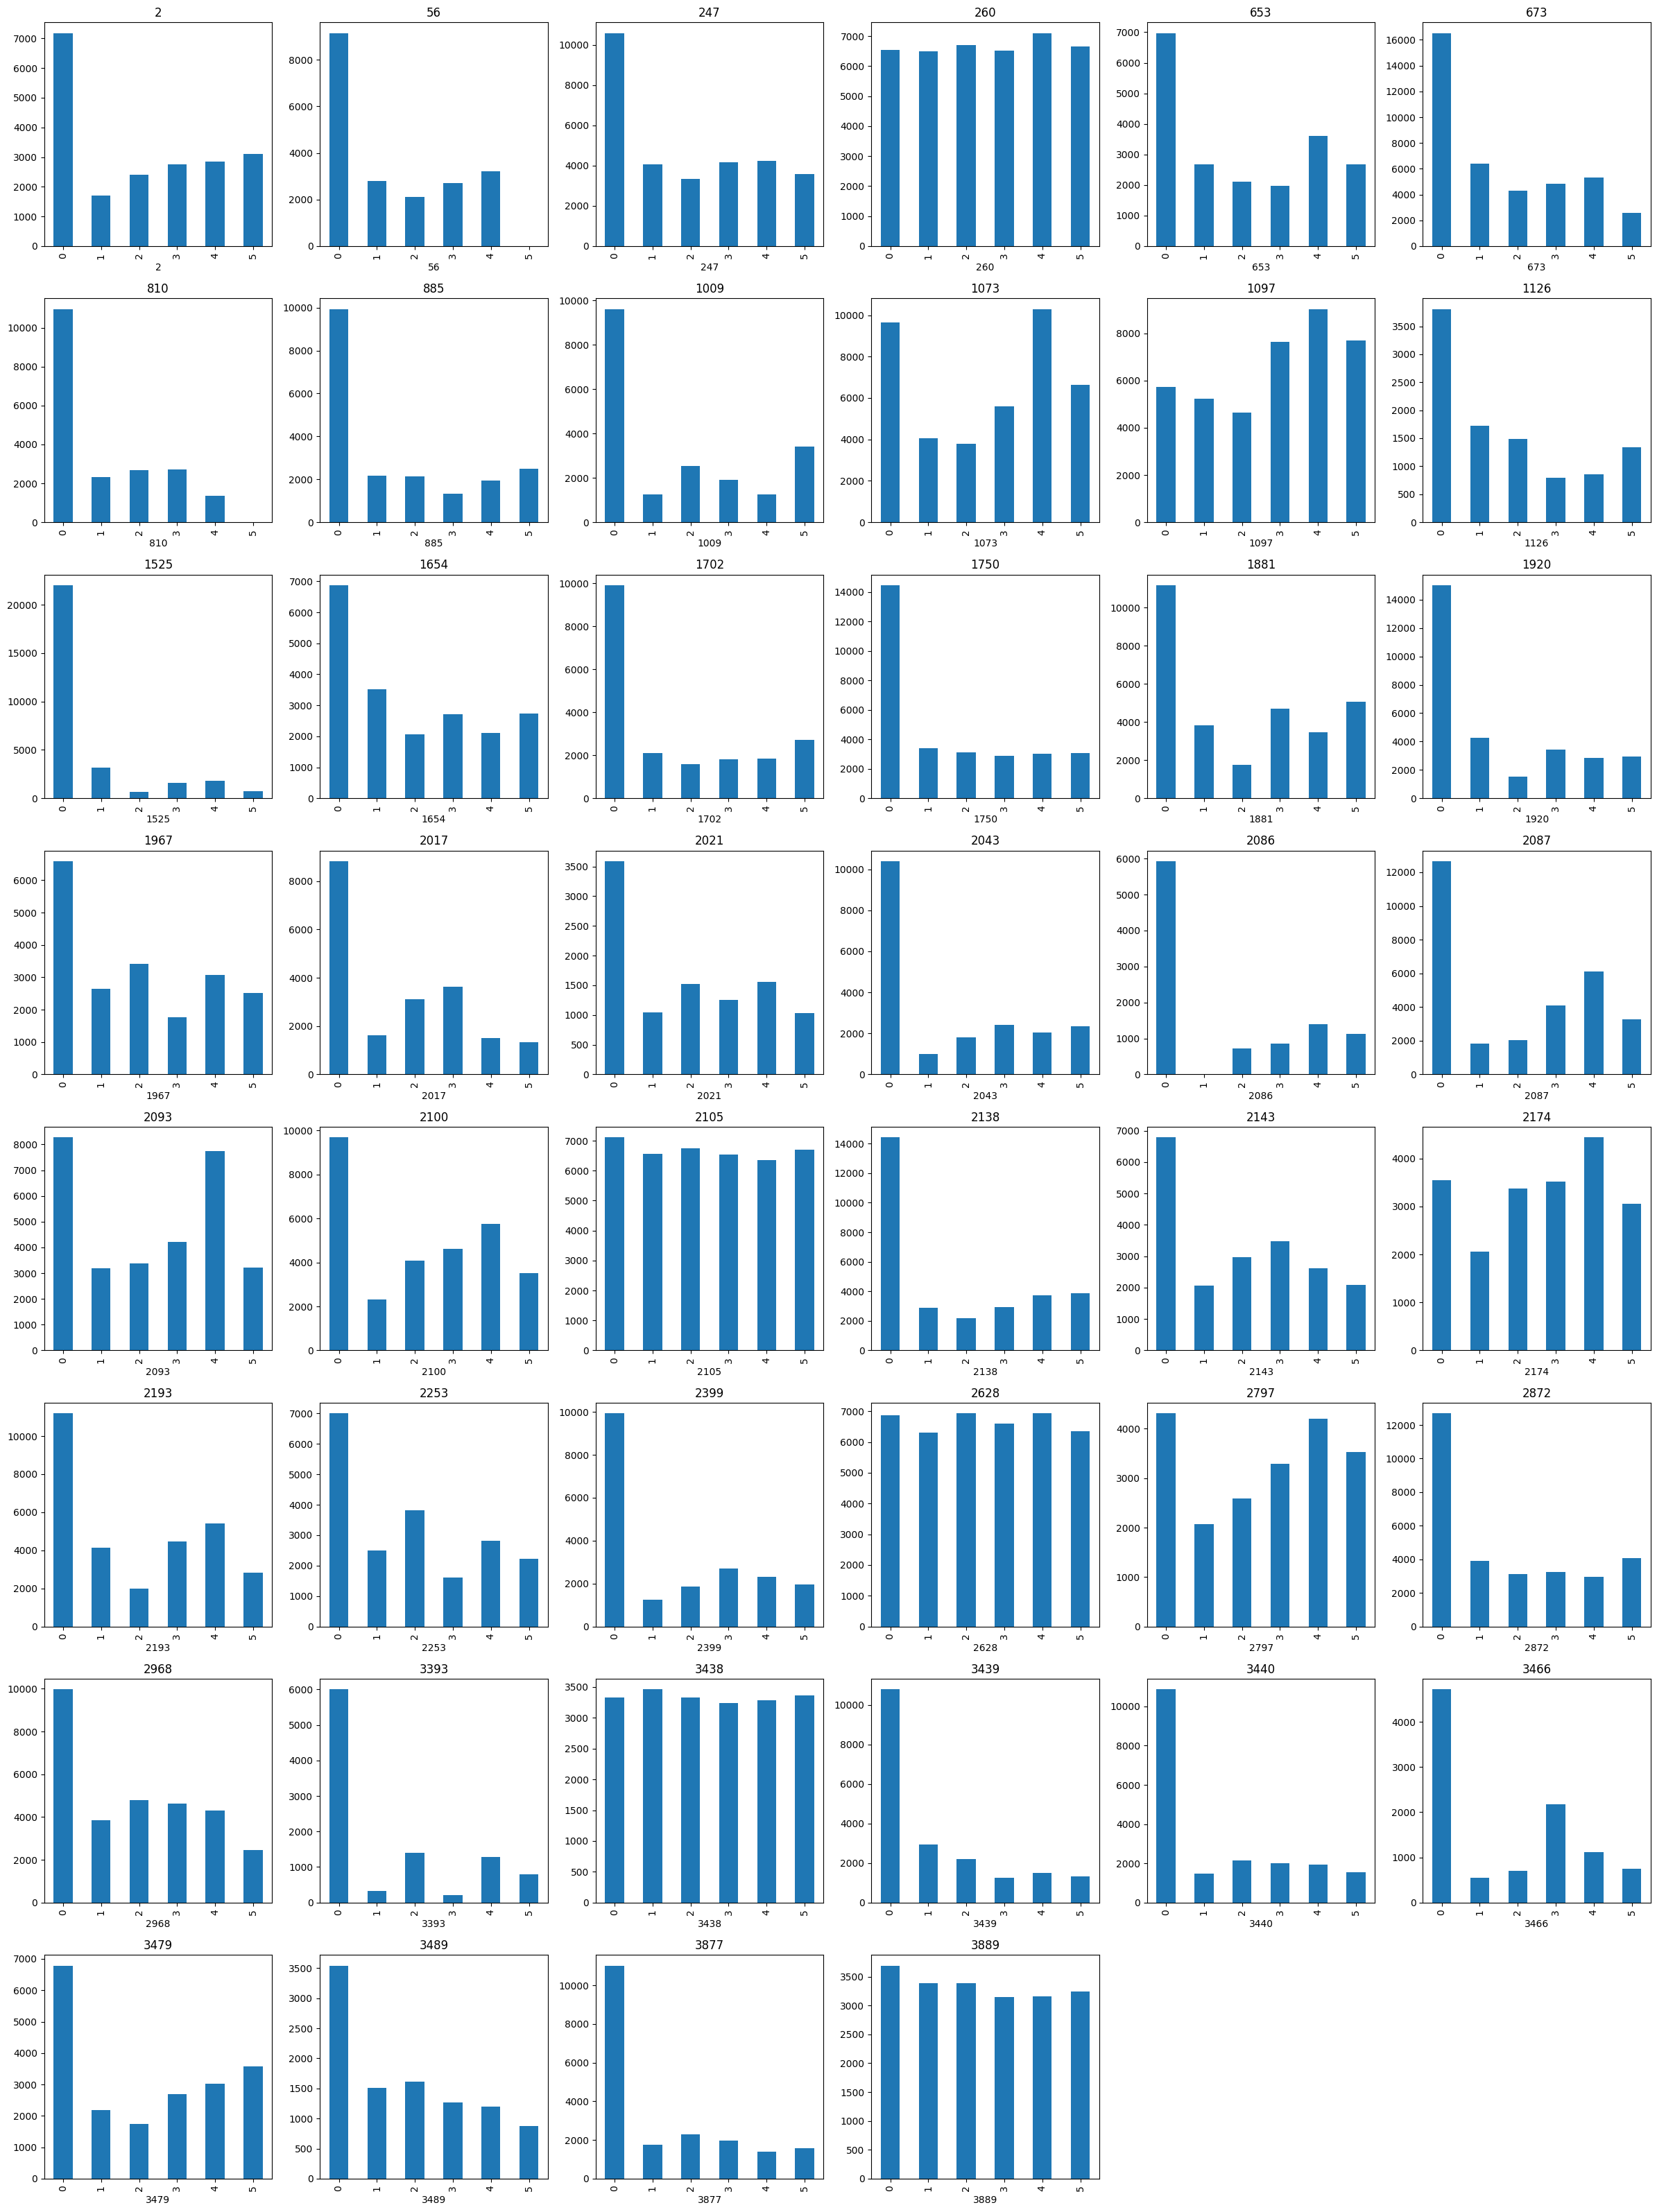

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# combined_dataが既に定義されていると仮定します

# カラムの総数を取得
num_cols = len(MOVIE_IDS)
# 列数を6に設定
num_per_row = 6
# 必要な行数を計算
num_rows = int(np.ceil(num_cols / num_per_row))

# サブプロットを作成
fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=(24, num_rows * 4))
axes = axes.flatten()

# # 各カラムに対して棒グラフを描画
for i, col in enumerate(MOVIE_IDS):
    value_counts = combined_data[col].value_counts().sort_index()
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

# 余ったサブプロットを削除
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### C0~C9の各cross集計の平均の可視化

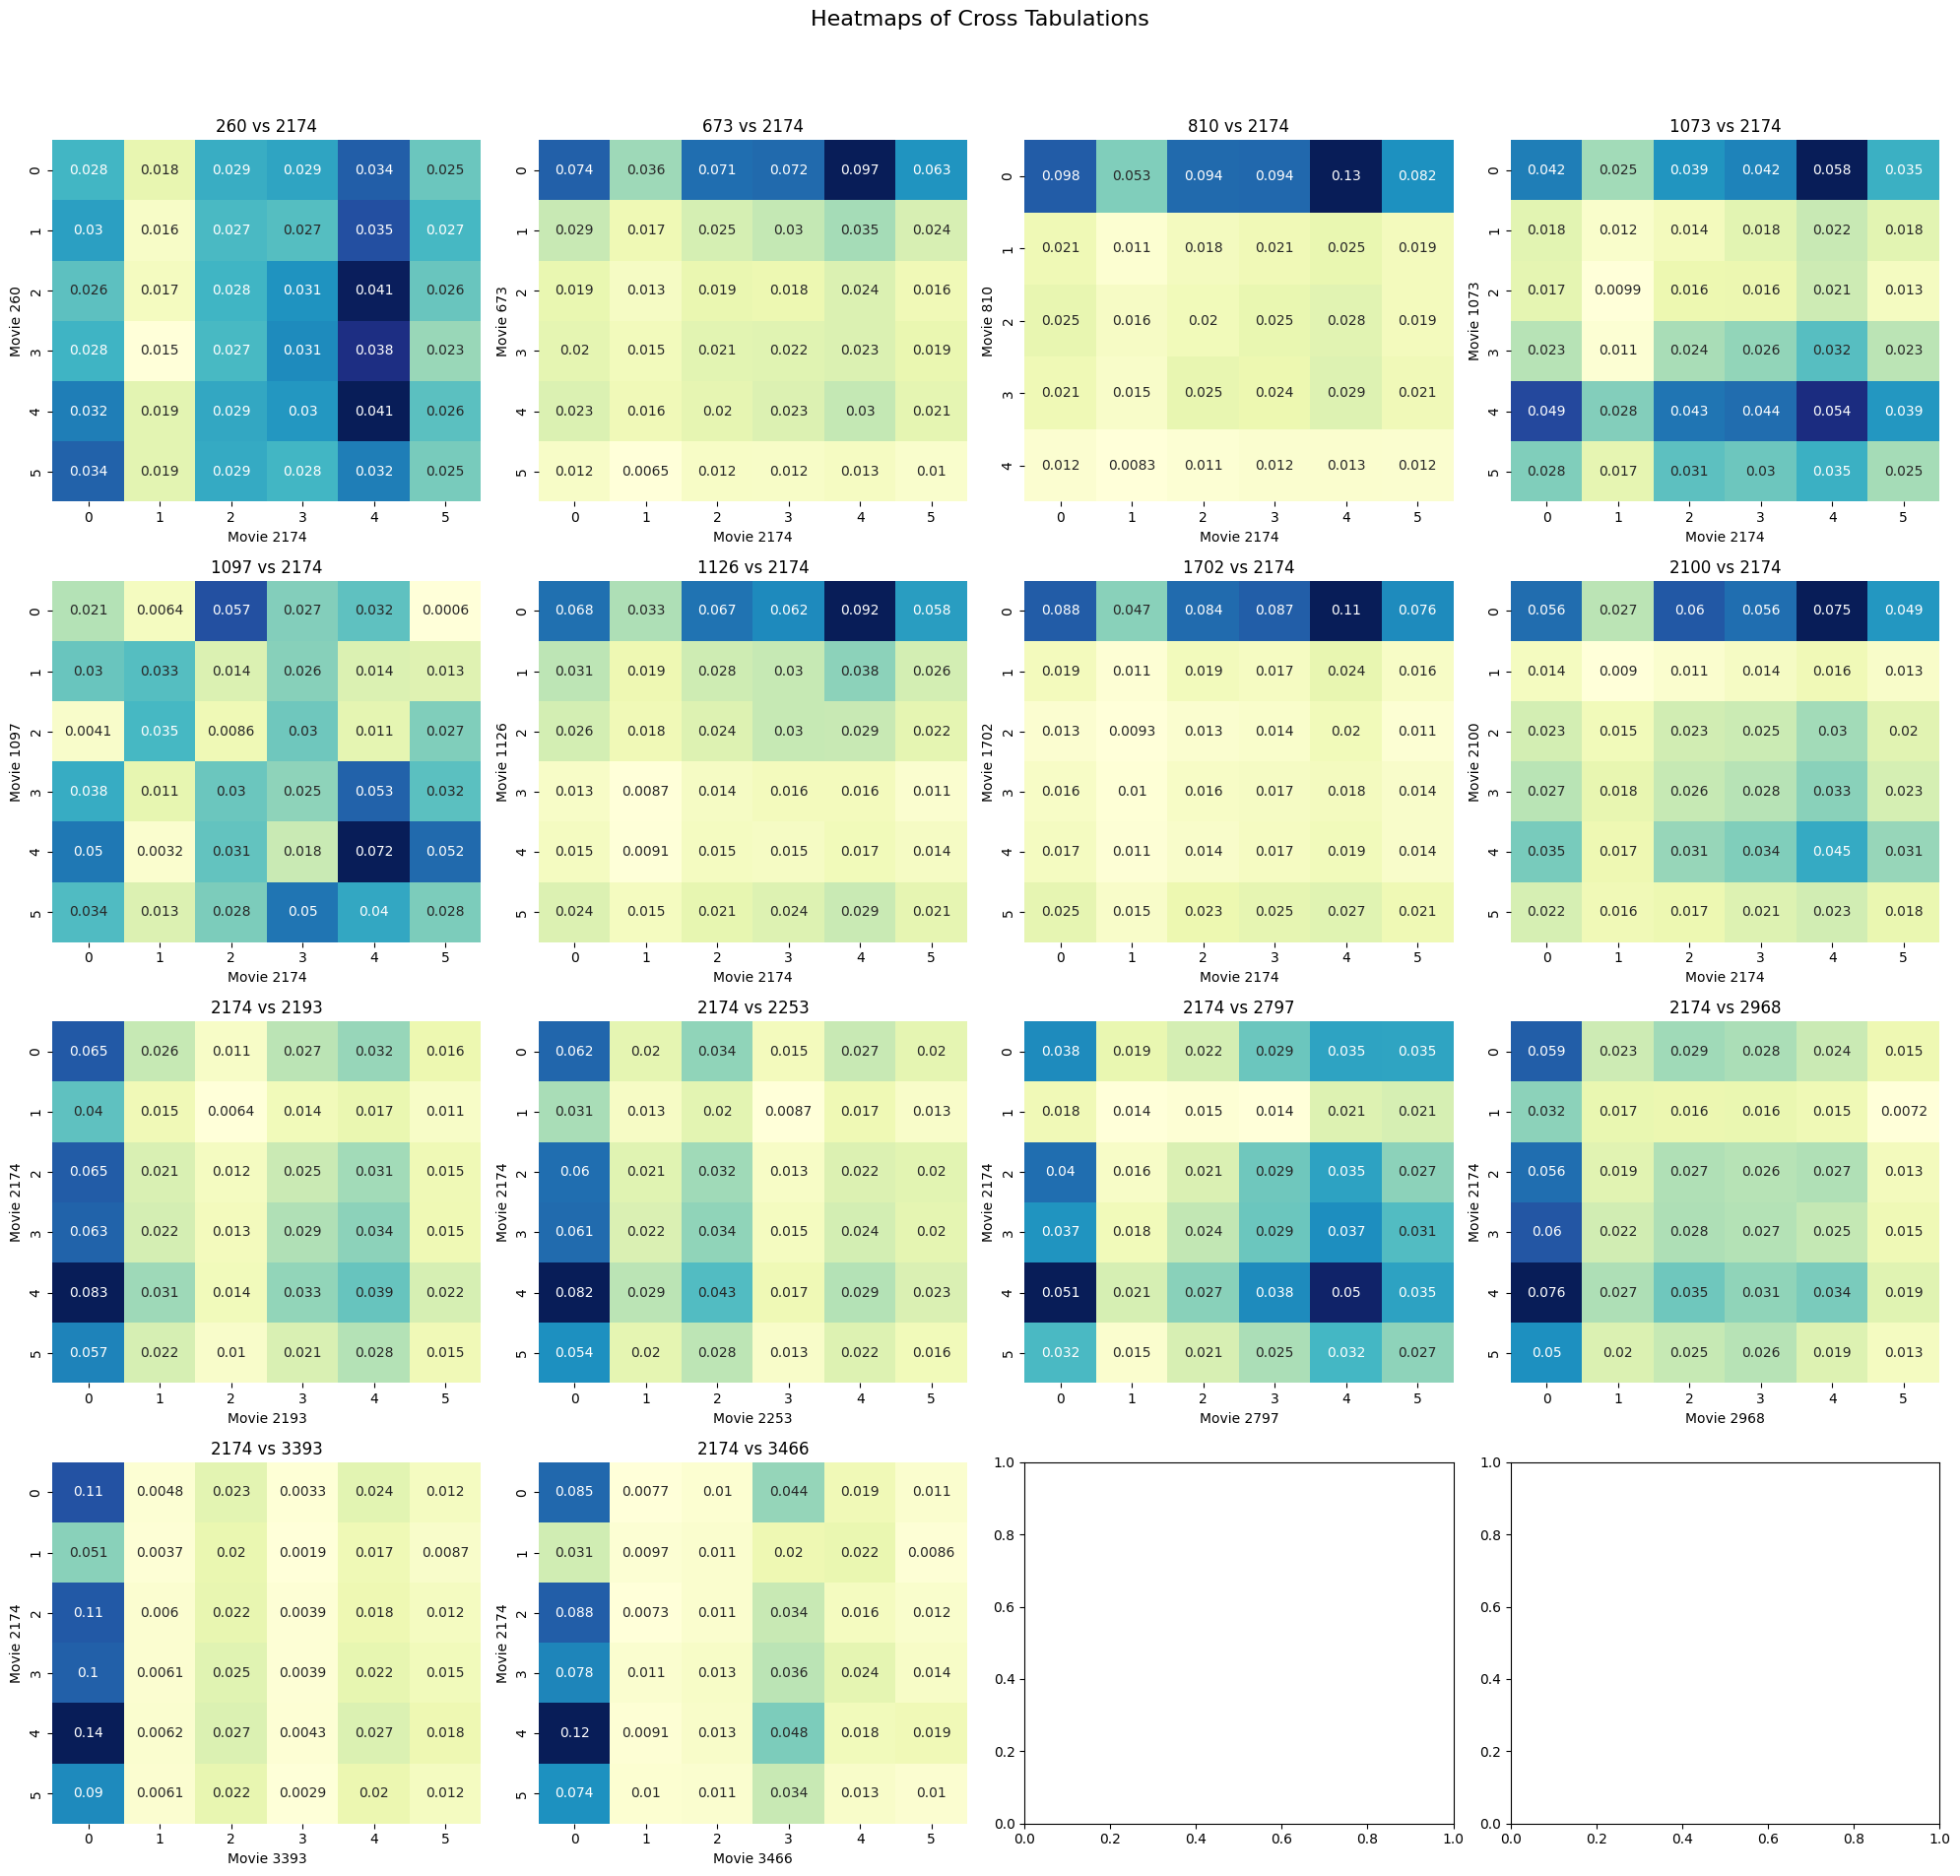

Total number of cross tabulations: 607


In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmaps(cross_tabs, num_plots=12, filter_movie_id=None):
    if filter_movie_id:
        cross_tabs = {k: v for k, v in cross_tabs.items() if filter_movie_id in k}
    num_rows = (num_plots + 3) // 4  # 4列で表示するために必要な行数を計算
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    fig.suptitle("Heatmaps of Cross Tabulations", fontsize=16)
    
    axes = np.array(axes).reshape(-1)  # axes を1次元配列に変換

    for i, ((movie_id_i, movie_id_j), cross_tab) in enumerate(list(cross_tabs.items())[:num_plots]):
        ax = axes[i]
        sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', ax=ax, cbar=False)
        ax.set_title(f"{movie_id_i} vs {movie_id_j}")
        ax.set_ylabel(f"Movie {movie_id_i}")
        ax.set_xlabel(f"Movie {movie_id_j}")

    # 使用していない subplot を削除
    for i in range(num_plots, num_rows * 4):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # suptitle のためのスペースを確保
    plt.show()

# 最初の20個のクロス集計表とそのヒートマップを表示
plot_heatmaps(cross_tabs, num_plots=16, filter_movie_id="2174")

# クロス集計表の数を表示
print(f"Total number of cross tabulations: {len(cross_tabs)}")

### Bbの特定の行の穴とそれが関連するクロス集計の調査

In [256]:
# Bbの指定した行を取得
target_Bb_row_index = 0
target_Bb_row = Bb.iloc[target_Bb_row_index]
target_Bb_row[:8]

2      5
56     1
247    2
260    0
653    5
673    1
810    0
885    1
Name: 0, dtype: object

In [257]:
hidden_movie_id = None
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] == "*":
        hidden_movie_id = movie_id
        break
hidden_movie_id

'1126'

これは `hidden_movie_id` が、2143であった場合に、クロス集計の偏りはそれとついになる 2 の映画の分布にも依存する。

実際に2143の真の偏りを見たい場合に、2 の偏りをなくすように正規化を行う。

In [258]:
# TODO:　ここの実装が複雑なので後ほど問題ないか確認する
# 各映画IDに対する target_cross を格納するリスト
cross_tabs_with_hidden_movie = []
epsilon = 1e-6

for movie_id_i, movie_id_j in cross_tab_pairs:
    if hidden_movie_id not in (movie_id_i, movie_id_j):
        continue
    cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
    paired_movie_id = None
    if hidden_movie_id == movie_id_i:
        paired_movie_id = movie_id_j
        # hidden_movie_idを縦の配置に揃えたいので、転置する
        cross_tab = cross_tab.T
    else:
        paired_movie_id = movie_id_i
    # print(cross_tab)
    # 2143       0       1       2       3       4       5
    # 2
    # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
    # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
    # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
    # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
    # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
    # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
    column_sums = cross_tab.sum()
    # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
    normalization_factors = (1/6) / column_sums
    # データフレームの各値に正規化係数を適用
    normalized_cross_tab = cross_tab * normalization_factors
    
    review_value = target_Bb_row[paired_movie_id]
    target_cross_tab = normalized_cross_tab.loc[int(review_value)]
    cross_tabs_with_hidden_movie.append(target_cross_tab)

cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)
cross_tabs_with_hidden_movie

,1,0,4,0,0,1,0,2,2,3
1126,,,,,,,,,,
0,0.019312,0.110133,0.042170,0.093931,0.069320,0.014582,0.084603,0.020012,0.004948,0.032930
1,0.031008,0.082461,0.039922,0.079264,0.052422,0.018120,0.040407,0.022578,0.023450,0.034787
2,0.033963,0.084570,0.046559,0.076248,0.035650,0.019906,0.043522,0.021030,0.052632,0.040148
3,0.028369,0.073425,0.037964,0.070505,0.053609,0.018148,0.047351,0.030663,0.005215,0.040050
4,0.027810,0.077556,0.043478,0.075989,0.044653,0.017822,0.046416,0.026831,0.075010,0.041520
5,0.032787,0.076254,0.047193,0.073646,0.037755,0.019001,0.037506,0.016642,0.020119,0.037630


<Axes: ylabel='1126'>

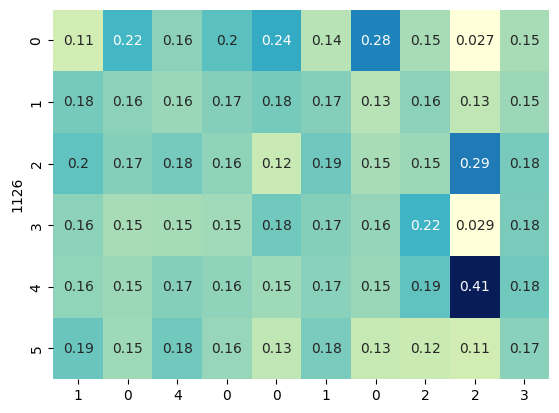

In [259]:
# 各カラムごとに総和が1になるように確率を正規化
def normalize_columns(df):
    return df.div(df.sum(axis=0), axis=1)

# クロス集計表を列ごとに正規化
normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
normalized_cross_tabs_with_hidden_movie

sns.heatmap(normalized_cross_tabs_with_hidden_movie, annot=True, cmap='YlGnBu', cbar=False)

In [260]:
# # TODO: ここがMEANでいいのかは要検討
hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
hidden_movie_probabilities


1126
0    0.166533
1    0.159469
2    0.177840
3    0.154408
4    0.190896
5    0.150855
dtype: float64

In [261]:
hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
hidden_movie_histgram

1126
0    0.3806
1    0.1720
2    0.1482
3    0.0799
4    0.0851
5    0.1342
Name: proportion, dtype: float64

In [262]:
# probability = (hidden_movie_probabilities - hidden_movie_histgram).sort_values(ascending=False)
probability = hidden_movie_probabilities.sort_values(ascending=False)
probability

1126
4    0.190896
2    0.177840
0    0.166533
1    0.159469
3    0.154408
5    0.150855
dtype: float64

In [263]:
probability.index[0]

4

## 正規のMAE ATTACK

In [264]:
# target_Bb_row_index = 0

result_list = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:　ここの実装が複雑なので後ほど問題ないか確認する
    # 各映画IDに対する target_cross を格納するリスト
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # 転置する
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
        normalization_factors = (1/6) / column_sums
        # データフレームの各値に正規化係数を適用
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # 各カラムごとに総和が1になるように確率を正規化
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    # hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.sum(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)
    # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    # probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    result_list.append(hidden_movie_probabilities.sort_values(ascending=False).index[0])

result_list = pd.Series(result_list).values
result_list

array([4, 2, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 5, 1, 4, 4,
       1, 5, 0, 0, 1, 0, 0, 1, 4, 0, 3, 2, 0, 5, 0, 1, 2, 0, 5, 0, 0, 0,
       4, 2, 4, 1, 0, 4])

In [265]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if TARGET_TYPE == "SUB":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

if TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[1 1 0 0 4 3 4 1 0 5 0 2 4 0 1 1 0 0 2 0 4 0 2 4 0 1 0 0 0 1 2 0 0 1 5 3 0
 1 0 0 1 4 0 0 3 5 4 1 0 2]
[4, 2, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 5, 1, 4, 4, 1, 5, 0, 0, 1, 0, 0, 1, 4, 0, 3, 2, 0, 5, 0, 1, 2, 0, 5, 0, 0, 0, 4, 2, 4, 1, 0, 4]


マッチングの成功率: <span style='color:yellow'>20</span> / 50

In [266]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>23</span>

## MAE ATTACK + ゴミ方式

In [267]:
MAX_0_COUNT = 28

answer_df = pd.DataFrame(index=range(50), columns=["Answer", "0_Prob", "NoCondition0", "MaxOther0"])

# 0を出力する確率
prob_0 = []
# 0以外の中で最も確率が高いもの
max_other_0 = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break

    # TODO:　ここの実装が複雑なので後ほど問題ないか確認する
    # 各映画IDに対する target_cross を格納するリスト
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        paired_movie_id = None
        if hidden_movie_id == movie_id_i:
            paired_movie_id = movie_id_j
            # 転置する
            cross_tab = cross_tab.T
        else:
            paired_movie_id = movie_id_i
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[paired_movie_id]

        column_sums = cross_tab.sum()
        # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
        normalization_factors = (1/6) / column_sums
        # データフレームの各値に正規化係数を適用
        normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = normalized_cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)

    # 各カラムごとに総和が1になるように確率を正規化
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.mean(axis=1)

    prob_0.append(hidden_movie_probabilities[0])

    max_other_index = hidden_movie_probabilities.iloc[1:].idxmax()
    max_other_0.append(max_other_index)

answer_df["0_Prob"] = prob_0
answer_df["MaxOther0"] = max_other_0
# 0_Probの上位MAX_0_COUNTを求める
top_0_probs = answer_df.nlargest(MAX_0_COUNT, "0_Prob")
# NoCondition0を設定
answer_df["NoCondition0"] = False
answer_df.loc[top_0_probs.index, "NoCondition0"] = True

# Answerを決定
answer_df["Answer"] = np.where(answer_df["NoCondition0"], 0, answer_df["MaxOther0"])


result_list = answer_df["Answer"].values
result_list

array([4, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 5, 1, 0, 0,
       1, 5, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 5, 0, 1, 2, 0, 5, 5, 0, 0,
       4, 2, 4, 1, 0, 4])

In [268]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if TARGET_TYPE == "SUB":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

if TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

if TARGET_TYPE == "MAIN" and ATTACK_TARGET == "16":
    Bx = pd.read_csv("../samples/our-answer/B16x.csv", header=None)
    X_ANSWER = Bx[1].values

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[1 1 0 0 4 3 4 1 0 5 0 2 4 0 1 1 0 0 2 0 4 0 2 4 0 1 0 0 0 1 2 0 0 1 5 3 0
 1 0 0 1 4 0 0 3 5 4 1 0 2]
[4, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 5, 1, 0, 0, 1, 5, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 5, 0, 1, 2, 0, 5, 5, 0, 0, 4, 2, 4, 1, 0, 4]


マッチングの成功率: <span style='color:yellow'>23</span> / 50

In [269]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>28</span>

## ゴミ方式をガチでランダムでやったらどうなるのか調査

In [270]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
import random

def printmd(string):
    display(Markdown(string))

my_answer = []
for _ in range(28):
    my_answer.append(0)
for _ in range(22):
    my_answer.append(random.choice([1, 2, 3, 4, 5]))

np.random.shuffle(my_answer)

if ATTACK_TARGET != "MAIN":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[1 1 0 0 4 3 4 1 0 5 0 2 4 0 1 1 0 0 2 0 4 0 2 4 0 1 0 0 0 1 2 0 0 1 5 3 0
 1 0 0 1 4 0 0 3 5 4 1 0 2]
[0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 4, 1, 1, 0, 4, 5, 4, 1, 0, 0, 3, 0, 0, 4, 0, 4, 0, 0, 1, 0, 0, 0, 1, 0, 1, 4, 0, 0, 1, 0, 1, 4]


マッチングの成功率: <span style='color:yellow'>14</span> / 50

In [271]:
import pandas as pd
import numpy as np

def ensure_complete_crosstab(cross_tab):
    return cross_tab
    all_ratings = range(6)  # 0から5までの評価
    for rating in all_ratings:
        if rating not in cross_tab.index:
            cross_tab.loc[rating] = 0
        if rating not in cross_tab.columns:
            cross_tab[rating] = 0
    return cross_tab.sort_index(axis=0).sort_index(axis=1)

def calculate_conditional_prob(cross_tab, observed_rating):
    # 隠れた評価（列）に対する条件付き確率を計算
    total = cross_tab.sum().sum()
    column_sums = cross_tab.sum()
    
    # P(hidden_rating | observed_rating) を計算
    conditional_prob = cross_tab.loc[observed_rating] / column_sums
    
    # 事前確率 P(hidden_rating) を計算
    prior_prob = column_sums / total
    
    # ベイズの定理を使用して P(hidden_rating | observed_rating) を計算
    posterior_prob = (conditional_prob * prior_prob) / (conditional_prob * prior_prob).sum()
    
    return posterior_prob


cross_tabs = ensure_complete_crosstab(cross_tabs)
result_list = []

for target_Bb_row_index in range(len(Bb)):
    print(f"\nProcessing row {target_Bb_row_index}")
    target_Bb_row = Bb.iloc[target_Bb_row_index]

    hidden_movie_id = next(movie_id for movie_id in MOVIE_IDS if target_Bb_row[movie_id] == "*")
    print(f"Hidden movie ID: {hidden_movie_id}")

    conditional_probs = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)].copy()
        # column_sums = cross_tab.sum()
        # # 正規化係数を計算（目標値 1/6 を各列の合計で割る）
        # normalization_factors = (1/6) / column_sums
        # # データフレームの各値に正規化係数を適用
        # normalized_cross_tab = cross_tab * normalization_factors
        # print(cross_tab)
        # print(review_value)
        # cross_tab = normalized_cross_tab.loc[int(review_value)]
        paired_movie_id = movie_id_j if hidden_movie_id == movie_id_i else movie_id_i
        
        if hidden_movie_id == movie_id_i:
            cross_tab = cross_tab.T
        
        cross_tab = ensure_complete_crosstab(cross_tab)
        
        review_value = target_Bb_row[paired_movie_id]
        if review_value != "*":
            observed_rating = int(review_value)
            # print(f"Paired movie ID: {paired_movie_id}, Observed rating: {observed_rating}")
            # print("Cross tab:")
            # print(cross_tab)
            
            conditional_prob = calculate_conditional_prob(cross_tab, observed_rating)
            # print("Conditional probability:")
            # print(conditional_prob)
            conditional_probs.append(conditional_prob)

    if conditional_probs:
        final_prob = pd.Series(1.0, index=range(6))
        for prob in conditional_probs:
            final_prob *= (prob + 1e-10)  # 小さな値を加えて0除算を防ぐ
        final_prob = final_prob / final_prob.sum()

        # hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
        # final_prob = final_prob - hidden_movie_histgram

        print(final_prob)
        
        predicted_rating = final_prob.idxmax()
    else:
        predicted_rating = combined_data[hidden_movie_id].mode().iloc[0]
    
    print(f"Predicted rating: {predicted_rating}")
    result_list.append(predicted_rating)

result_list = pd.Series(result_list).values
print("\nFinal result list:")
print(result_list)


Processing row 0
Hidden movie ID: 1126
0    9.986194e-01
1    8.637654e-04
2    4.766275e-04
3    1.162336e-07
4    2.919934e-06
5    3.719376e-05
dtype: float64
Predicted rating: 0

Processing row 1
Hidden movie ID: 2105
0    0.523217
1    0.089624
2    0.268627
3    0.029107
4    0.033437
5    0.055988
dtype: float64
Predicted rating: 0

Processing row 2
Hidden movie ID: 1920
0    1.000000e+00
1    5.865246e-15
2    4.767132e-26
3    8.990475e-17
4    6.801641e-19
5    1.267380e-19
dtype: float64
Predicted rating: 0

Processing row 3
Hidden movie ID: 2086
0    0.999774
1         NaN
2    0.000005
3    0.000009
4    0.000169
5    0.000043
dtype: float64
Predicted rating: 0

Processing row 4
Hidden movie ID: 2872
0    1.000000e+00
1    1.642642e-11
2    3.527835e-14
3    2.488163e-12
4    2.355953e-13
5    1.166284e-10
dtype: float64
Predicted rating: 0

Processing row 5
Hidden movie ID: 2100
0    9.999173e-01
1    3.049680e-12
2    1.705927e-07
3    1.509839e-05
4    6.740984e-05
5  

In [272]:
# import pandas as pd
# import numpy as np

# def ensure_complete_crosstab(cross_tab):
#     return cross_tab

# def calculate_conditional_prob(cross_tab, observed_rating):
#     # 隠れた評価（列）に対する条件付き確率を計算
#     total = cross_tab.sum().sum()
#     column_sums = cross_tab.sum()
    
#     # P(hidden_rating | observed_rating) を計算
#     conditional_prob = cross_tab.loc[observed_rating] / column_sums
    
#     # 事前確率 P(hidden_rating) を計算
#     prior_prob = column_sums / total
    
#     # ベイズの定理を使用して P(hidden_rating | observed_rating) を計算
#     posterior_prob = (conditional_prob * prior_prob) / (conditional_prob * prior_prob).sum()
    
#     return posterior_prob

# cross_tabs = ensure_complete_crosstab(cross_tabs)
# result_list = []
# prob_0_list = []  # 0の確率を格納するリスト

# for target_Bb_row_index in range(len(Bb)):
#     print(f"\nProcessing row {target_Bb_row_index}")
#     target_Bb_row = Bb.iloc[target_Bb_row_index]

#     hidden_movie_id = next(movie_id for movie_id in MOVIE_IDS if target_Bb_row[movie_id] == "*")
#     print(f"Hidden movie ID: {hidden_movie_id}")

#     conditional_probs = []

#     for movie_id_i, movie_id_j in cross_tab_pairs:
#         if hidden_movie_id not in (movie_id_i, movie_id_j):
#             continue
#         cross_tab = cross_tabs[(movie_id_i, movie_id_j)].copy()
#         paired_movie_id = movie_id_j if hidden_movie_id == movie_id_i else movie_id_i
        
#         if hidden_movie_id == movie_id_i:
#             cross_tab = cross_tab.T
        
#         cross_tab = ensure_complete_crosstab(cross_tab)
        
#         review_value = target_Bb_row[paired_movie_id]
#         if review_value != "*":
#             observed_rating = int(review_value)
#             conditional_prob = calculate_conditional_prob(cross_tab, observed_rating)
#             conditional_probs.append(conditional_prob)

#     if conditional_probs:
#         final_prob = pd.Series(1.0, index=range(6))
#         for prob in conditional_probs:
#             final_prob *= (prob + 1e-10)
#         final_prob = final_prob / final_prob.sum()

#         hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
#         final_prob = final_prob - hidden_movie_histgram

#         print(final_prob)
        
#         prob_0 = final_prob[0]
#         prob_0_list.append((target_Bb_row_index, prob_0))
        
#         non_zero_max = final_prob[1:].idxmax()
#         result_list.append((target_Bb_row_index, prob_0, non_zero_max))
#     else:
#         result_list.append((target_Bb_row_index, 0, combined_data[hidden_movie_id].mode().iloc[0]))

# # 0の確率で上位26件を選択
# top_28_zero = sorted(prob_0_list, key=lambda x: x[1], reverse=True)[:28]
# top_28_indices = set([x[0] for x in top_28_zero])

# # 最終的な結果リストを作成
# final_result = []
# for idx, prob_0, non_zero_max in result_list:
#     if idx in top_28_indices:
#         final_result.append(0)
#     else:
#         final_result.append(non_zero_max)

# print("\nFinal result list:")
# print(final_result)

In [273]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if TARGET_TYPE == "SUB":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

if TARGET_TYPE == "UTIL100":
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

if TARGET_TYPE == "MAIN" and ATTACK_TARGET == "16":
    Bx = pd.read_csv("../samples/our-answer/B16x.csv", header=None)
    X_ANSWER = Bx[1].values

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[1 1 0 0 4 3 4 1 0 5 0 2 4 0 1 1 0 0 2 0 4 0 2 4 0 1 0 0 0 1 2 0 0 1 5 3 0
 1 0 0 1 4 0 0 3 5 4 1 0 2]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0]


マッチングの成功率: <span style='color:yellow'>25</span> / 50